# Probability review

In [29]:
import numpy as np

from matplotlib import rc
# rc('font', **{'family': 'serif'})
# rc('text', usetex=True)

import matplotlib.pyplot as plt
plt.style.use('default')
import collections
import string
# to remove all non-alphabetical characters
import re

## The Monty Hall Paradox

Let us first review some basic probabilistic notions using a famous paradox: the Monty Hall Problem. First play the game on this __[online simulation](http://math.ucsd.edu/~crypto/Monty/monty.html)__. Don't look at the explanation yet!

Afterwards try to figure out whether it is better to switch doors or not to switch doors, and explain why. If you have heard about this problem before, try to recall what is the better option and how it can be proved. Once you are content with your own explanation, read the discussions __[here](http://math.ucsd.edu/~crypto/Monty/montybg.html)__ and __[here](http://mathforum.org/dr.math/faq/faq.monty.hall.html)__. Finally give a proof using conditional probabilities.

Now consider this scenario: there are again 3 doors, 2 hiding a goat and 1 hiding a car. You again get to choose one door. Suddenly the wind opens one of the other doors and you see that it was hiding a goat. 
You are again given the option to switch doors. This is the Monty does not know version of the game. You can play it online on the same __[website](http://math.ucsd.edu/~crypto/Monty/montydoesnotknow.html )__.

__Question 1:__ In case Monty opens a door that does not have the car behind it, should you switch in this scenario as well? Does the answer to the second question invalidate any of the less rigorous explanations given in the discussions of the problem?

## The birthday problem

Now visit this __[simulation](https://pudding.cool/2018/04/birthday-paradox/)__ of the __[the birthday problem](https://en.wikipedia.org/wiki/Birthday_problem)__ by the online magazine *The Pudding*.

### Combinatorics

As the animation stresses, the reason why the probability that two people have the same birthday among a group of 23 people is approximately $\frac{1}{2}$ and thus much higher than one would expect, is that the number of pairwise comparisons in a group of $23$ people is ${23 \choose 2} = 253$. In general ${n \choose k}$ is called a binomial coefficient and they are equal to the number of combinations of $k$ elements from a set of $n$ elements. As you can see in the following graph, they increase very fast, even if $k = 2$.

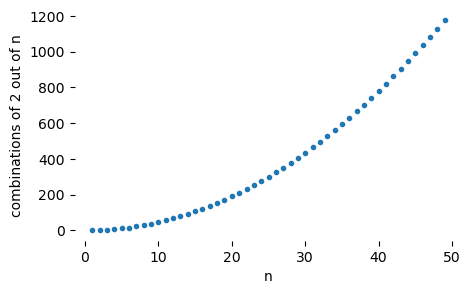

In [30]:
X = range(1,50)
Y = [x*(x-1)/2 for x in X]

plt.figure(figsize=(5, 3))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.xlabel("n")
plt.ylabel("combinations of 2 out of n")

plt.plot(X,Y, linestyle = '', marker = '.');


Binomial coefficients are probably the most common combinatorial quantity, but there are many more. Some of them will come up in this class, but for now I recommend that you have a look at Appendix on of Probability by Jim Pitman, which can be accessed using this __[link](http://oskicat.berkeley.edu/search~S1?/Xpitman+probability&searchscope=1&SORT=DZ/Xpitman+probability&searchscope=1&SORT=DZ&extended=0&SUBKEY=pitman+probability/1%2C27%2C27%2CB/frameset&FF=Xpitman+probability&searchscope=1&SORT=DZ&2%2C2%2C)__ by UC Berkeley students.

### The law of large numbers

The explanations on the birthday problem animation also make use of an important principle of probability: the law of large numbers. It says the following: Suppose $X_1, X_2, …$ are independent and identically distributed random variables, and let each single one have mean $\mu$. Now define $S_n = X_1+…+X_n$ to be the sum of the first $n$ of these random variables. The law of large numbers says that $\frac{S_n}{n}$ converges to $\mu$. In words this means that the average value of $n$ independent identically distributed random variables converges to the expected value of a single of these random variables. This convergence occurs *with probability 1*, but the technicalities of that are beyond this course, and can be safely ignored for now. See __[wikipedia](https://en.wikipedia.org/wiki/Law_of_large_numbers)__ for different versions, and a nice animation. 

Let us now try to apply the law of large numbers to a different area than common birthdays: __[letter frequency](https://en.wikipedia.org/wiki/Letter_frequency)__ in English texts.

## Letter frequency in English texts

Let us look at the distribution of the letters in some English text. The box plot below will show the counts for each letter. You can use any text that you like for the following, by simply copying the text into the cell below. Just be careful to maintain the triple quotes at the beginning and end. For the following comparisons to make sense it would be better if you choose an English text. If you don't change it, the current text is the poem "__[The giver (for Berdis)](https://www.poetryfoundation.org/poems/88930/the-giver-for-berdis)__" by James Baldwin. 

In [31]:
# Let us look at the distribution of the letters in an untitled poem by James Baldwin:
text = """If the hope of giving
is to love the living,
the giver risks madness
in the act of giving.

Some such lesson I seemed to see
in the faces that surrounded me.
Needy and blind, unhopeful, unlifted,
what gift would give them the gift to be gifted?
          The giver is no less adrift
          than those who are clamouring for the gift.

If they cannot claim it, if it is not there,
if their empty fingers beat the empty air
and the giver goes down on his knees in prayer
knows that all of his giving has been for naught
and that nothing was ever what he thought
and turns in his guilty bed to stare
at the starving multitudes standing there
and rises from bed to curse at heaven,
he must yet understand that to whom much is given
much will be taken, and justly so:
I cannot tell how much I owe. """

# we now delete all the non-alphacetical characters from the string
regex = re.compile('[^a-zA-Z]')
#First parameter is the replacement, second parameter is your input string
text = regex.sub('', text)

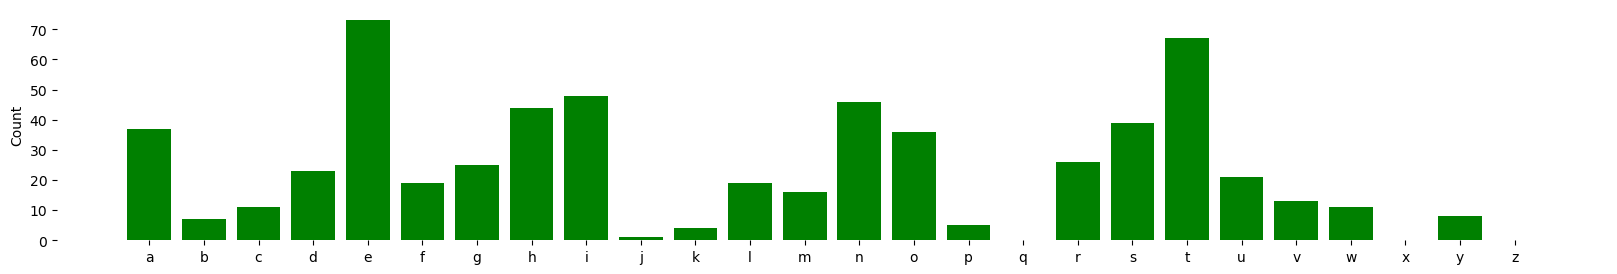

In [32]:
L = collections.Counter(text)
L = { letter: L[letter] for letter in list(string.ascii_lowercase) }
plt.style.use('default')
plt.figure(figsize=(20, 3))
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.bar(L.keys(), L.values(), color='g')
plt.ylabel("Count");

Now let us compare this to the distribution of letters in the English language.

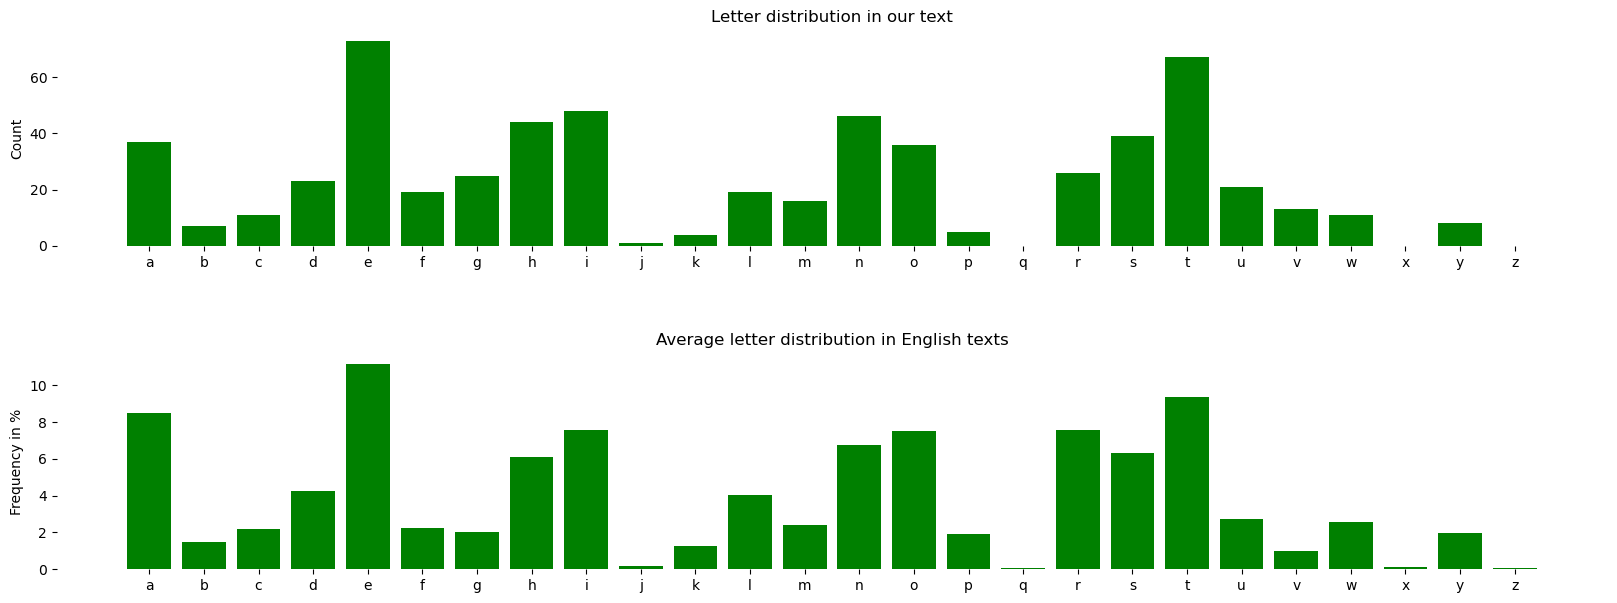

In [33]:
# this distribution is taken from wikipedia.
EngF = {'a': 8.497, 'b': 1.492, 'c': 2.202, 'd': 4.235, 'e': 11.162, 'f': 2.228, 'g': 2.015, 'h': 6.094, 
        'i': 7.546, 'j': 0.153, 'k': 1.292, 'l': 4.025, 'm': 2.406, 'n': 6.749, 'o': 7.507, 'p': 1.929, 
        'q': 0.095, 'r': 7.587, 's': 6.327, 't': 9.356, 'u': 2.758, 'v': 0.978, 'w': 2.560, 'x': 0.150, 
        'y': 1.994, 'z': 0.077}



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,7))
#subplot spacing
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(False)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False)
ax2.spines["top"].set_visible(False)    
ax2.spines["bottom"].set_visible(False)    
ax2.spines["right"].set_visible(False)    
ax2.spines["left"].set_visible(False) 
ax1.bar(L.keys(), L.values(), color='g')
ax1.set_ylabel("Count")
ax1.set_title("Letter distribution in our text")
ax2.bar(EngF.keys(), EngF.values(), color='g')
ax2.set_ylabel("Frequency in %")
ax2.set_title("Average letter distribution in English texts");

__Question 2:__ Do these bar plots look pretty similar for the text you chose? If not why do you think that is the case?

Let us now look at the distribution of a specific letter in the text and see the law of large numbers in action. In the figure below you can see in blue how the frequency of the letter specified at the very top evolves as we go through the text. So the point of the blue line where the $x$-coordinate is $n$ is the proportion of the chosen letter among the first $n$ letters of the text. The yellow line is the average frequency of that letter in English texts. In most cases you will see that as we go through the text, the frequency of the letter will approach its average value. Have a look at a few examples by changing the variable letter at the very top. For instance, if you want to see the frequency of the letter "a" you need to write *letter = 'a'*.

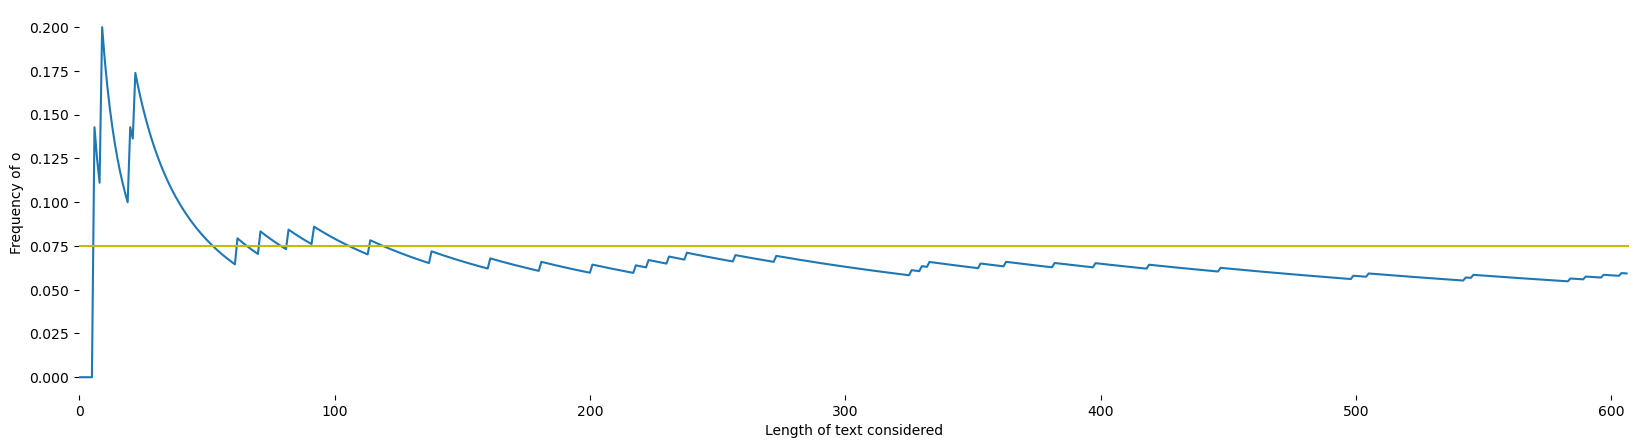

In [34]:
#letter of interest
letter = 'o'

# we need the length so that we know where to stop
s = len(text)
count = np.zeros(s+1)
count[0] = 0
i = 1
for c in text:
    if ( c == letter.lower() ) | ( c == letter.upper() ):
        count[i] = count[i-1] + 1
    else:
        count[i] = count[i-1]
    i = i+1
    
plt.style.use('default')
plt.figure(figsize=(20, 5))

ax = plt.subplot(111)  
# Remove the plot frame lines.
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
ax.set_xlabel("Length of text considered")
ax.set_ylabel("Frequency of " + letter)
ax.set_xlim(0,s)

plt.plot(count[range(1,s+1)]/range(1,s+1))
plt.axhline(y = EngF[letter]/100, color='y', linestyle='-');

__Question 3:__ Is the convergence better or faster for some letters? If the proportion of the letter you looked at is not converging to the typical distribution in English texts, why could that be? If we now go back to the theory behind all of this, we should recall that one condition of the classical law of large numbers is that the random variables are independent. Is this true for the experiments we mentioned above?

## Assignment

Please choose one of questions 1, 2 or 3 posed in the notebook and post an answer together with the question number in the corresponding bCourses discussion page.